In [1]:
# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [6]:
# Extract all rows of data

# Find the table element, easy when one table lol. 
table = soup.find('table')

# Find all rows in the table
rows = table.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Creating mars, an empty list
mars = []
# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all cells in the row
    cells = row.find_all('td')

    # Extract the text from each cell
    data = [cell.text for cell in cells]
    # putting the data into mars list woot woot
    mars.append(data)


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create an empty DataFrame
df =pd.DataFrame() 
#filling data frame with list- god I love pandas!
df = pd.DataFrame(mars)
# easier then typing the pandas column names out sorry.
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
# Rename columns in the DataFrame
new_column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = df.rename(columns=dict(zip(df.columns, new_column_names)))


In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes



id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
#df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(float)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
# Count unique months
num_months = df['month'].nunique()

# Print the number of months
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many Martian days' worth of data are there?
day_count = df['id'].count()
print(f"There are {day_count} days of data on Mars in our data set.")

There are 1867 days of data on Mars in our data set.


In [15]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()
# trying to get around issues we saw in office hours...
df['month'] = pd.to_numeric(df['month'], errors='coerce')
# now they are numbers can sort. Hoping graph will pic this up. 
sorted_avg_low_temp_by_month = avg_low_temp_by_month.sort_values(ascending=True)

#checking it worked.
sorted_avg_low_temp_by_month

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

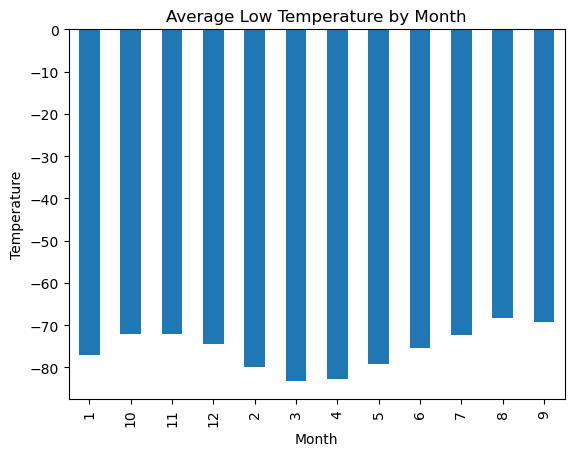

In [16]:
# Plot the average temperature by month
avg_low_temp_by_month.plot(kind='bar')

# Set the plot title and labels
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')

# Display the plot
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
#cold using idxmin func -not in class got from stack over flow. same wit max. 
coldest_month = df['month'].loc[df['min_temp'].idxmin()]
#hot
hottest_month = df['month'].loc[df['min_temp'].idxmax()]


In [18]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

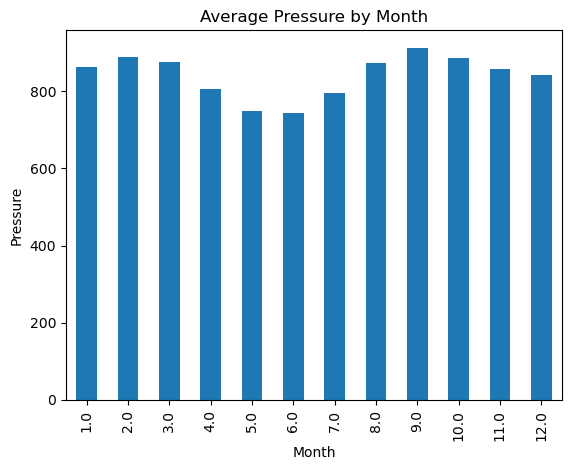

In [19]:
# Plot the average pressure by month

average_pressure_by_month.plot(kind='bar')

# Set the plot title and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Pressure')

# Display the plot
plt.show()

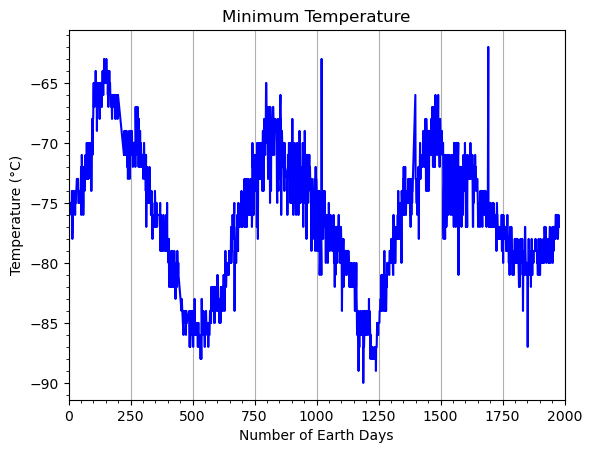

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!
Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.
The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days..


In [23]:
# # 5. How many terrestrial (earth) days are there in a Martian year?

## 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df["sol"], df["min_temp"], color="blue")
plt.title("Minimum Temperature")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature (°C)")
plt.grid(True, axis='x')
plt.xlim(0, 2000)
plt.minorticks_on()
plt.show()

print(f"On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!")
print(f"Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.")
print(f"The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days..")


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV 

df.to_csv('df.csv', index=False)

In [ ]:
browser.quit()